Clasele de malware:
 * Adialer.C
 * Agent.FYI
 * Allaple.A
 * Allaple.L
 * Alueron.gen!J
 * Autorun.K
 * C2LOP.P
 * C2LOP.gen!g
 * Dialplatform.B
 * Dontovo.A
 * Fakerean
 * Instantaccess
 * Lolyda.AA1
 * Lolyda.AA2
 * Lolyda.AA3
 * Lolyda.AT
 * Malex.gen!J
 * Obfuscator.AD
 * Rbot!gen
 * Skintrim.N
 * Swizzor.gen!E
 * Swizzor.gen!I
 * VB.AT
 * Wintrim.BX
 * Yuner.A

​Funcția următoare ne permite să convertim fișierele noastre .bytes în format hexazecimal, stocate în folderul 'data', în imagini PNG.

In [1]:
root = "../Data/malimg/"

In [2]:
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt

# Ensure the root variable is defined
root = "../Data/malimg/"


def convertAndSave(array,name):
    print('Processing '+name)
    if array.shape[1]!=16: 
        assert(False)
    b=int((array.shape[0]*16)**(0.5))
    b=2**(int(log(b)/log(2))+1)
    a=int(array.shape[0]*16/b)
    array=array[:a*b//16,:]
    array=np.reshape(array,(a,b))
    im = Image.fromarray(np.uint8(array))
    im.save(root+ name+'.png', "PNG")
    return im


files=os.listdir(root)
print('files : ',files)

for counter, name in enumerate(files):
        if '.bytes' != name[-6:]:
            continue
        f=open(root+'/'+name)
        array=[]
        for line in f:
            xx=line.split()
            if len(xx)!=17:
                continue
            array.append([int(i,16) if i!='??' else 0 for i in xx[1:] ])
        plt.imshow(convertAndSave(np.array(array),name))
        del array
        f.close()

files :  ['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.gen!g', 'C2LOP.P', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A']


# Preprocesare - Generare dataset

In [3]:
path_root = "../Data/malimg/"


In [4]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64,64), batch_size=10000) # 10000 imagini în batch, eu am 9348


Found 9348 images belonging to 25 classes.


In [6]:
type(batches)

keras.src.legacy.preprocessing.image.DirectoryIterator

Pentru a putea utiliza imaginile noastre pentru antrenament și testare, vom folosi **ImageDataGenerator.flow_from_directory()**, care generează loturi de date de imagini tensor normalizate din directoarele de date corespunzătoare.

  * **target_size** : Va redimensiona toate imaginile la dimensiunea specificată. Personal, am testat pentru imagini de (64,64) și (256,256).
  * **batch_size** : Este dimensiunea lotului pe care îl vom utiliza.

​Putem observa că cele 25 de clase au fost recunoscute corect (datorită subfolderelor). Să clarificăm acest aspect folosind dicționarul.

In [7]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

batchurile generate cu ImageDataGenerator() sunt un iterator. Prin urmare, folosim next() pentru a parcurge toate elementele sale și a genera un lot de imagini și etichete din setul de date.

In [8]:
imgs, labels = next(batches)

As you can see, our images are in RGB with shape 64x64 [width x length x depth].

In [9]:
imgs.shape

(9348, 64, 64, 3)

**labelurile** au forma (batch_size, number of classes).

In [10]:
labels.shape

(9348, 25)

In [11]:
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt

In [12]:
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

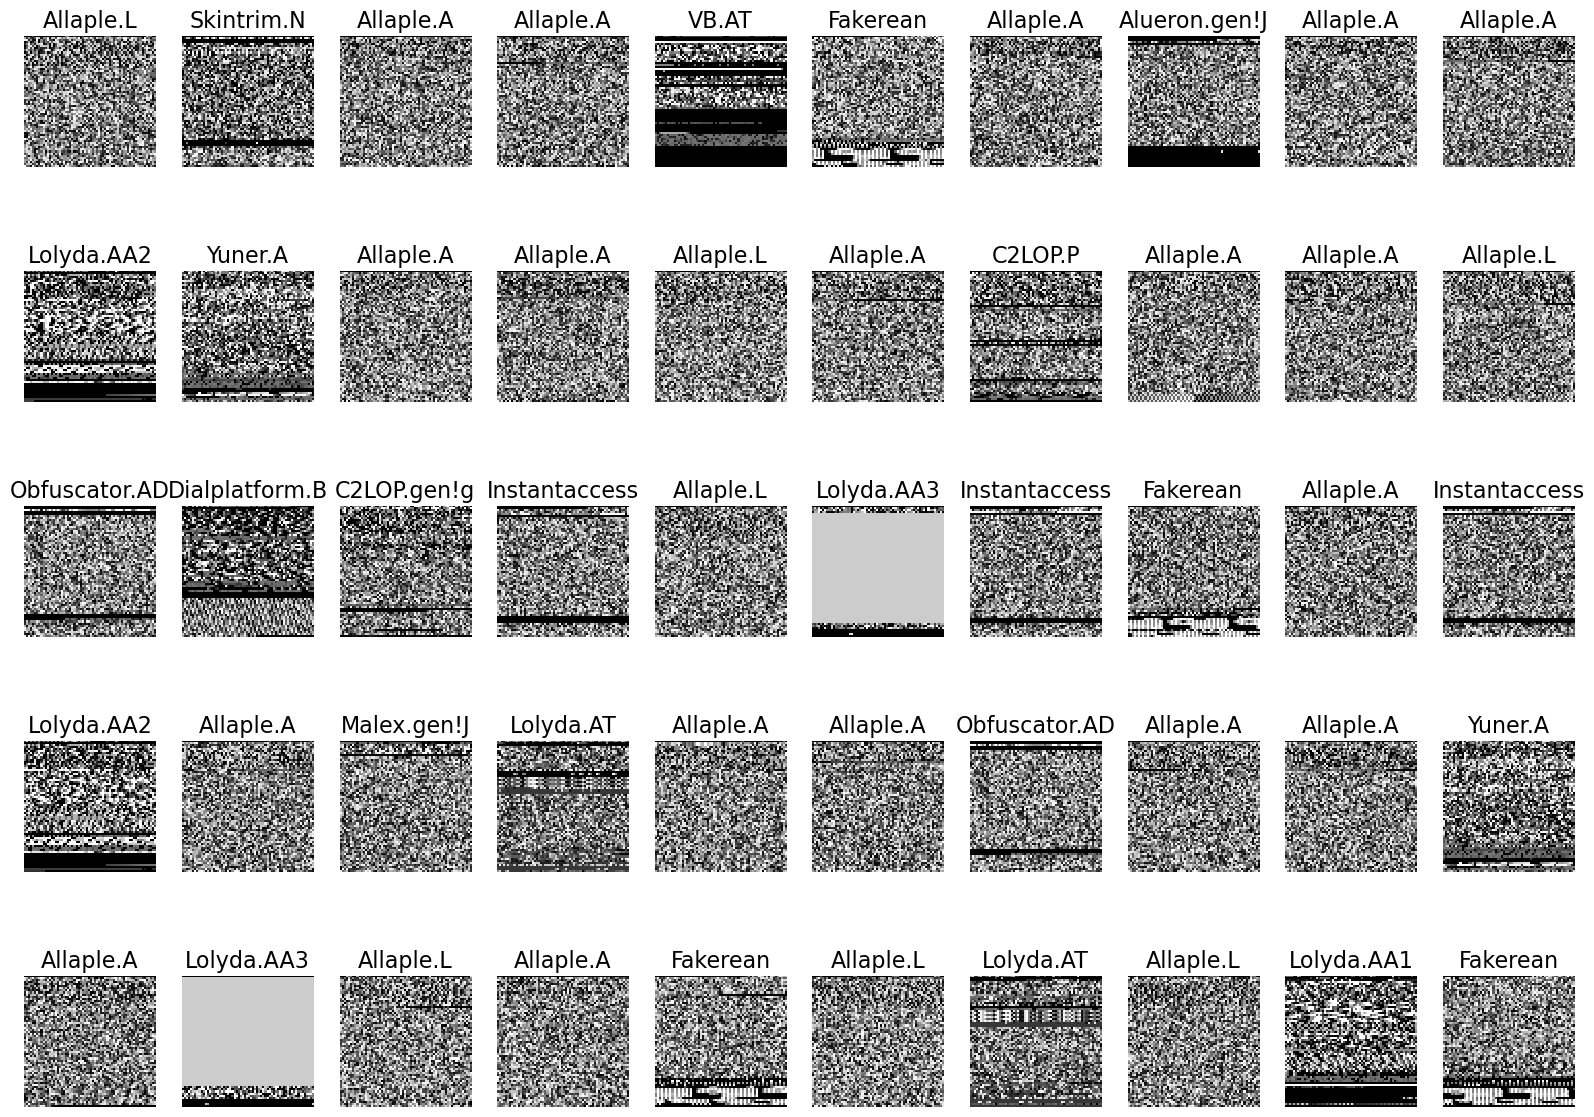

In [13]:
plots(imgs, titles = labels)

Deja se pot observa diferenţe între clase.

# Analiză 

Toate imaginile noastre sunt în sfârșit gata de utilizare. Hai să verificăm repartizarea datelor între clase:

In [14]:
classes = batches.class_indices.keys()

In [15]:
perc = (sum(labels)/labels.shape[0])*100

In [16]:
sum((labels))

array([ 121.,  116., 2959., 1591.,  198.,  106.,  146.,  200.,  177.,
        162.,  381.,  431.,  213.,  184.,  123.,  159.,  136.,  142.,
        158.,   80.,  128.,  132.,  408.,   97.,  800.], dtype=float32)

In [17]:
perc = (sum(labels))

<BarContainer object of 25 artists>

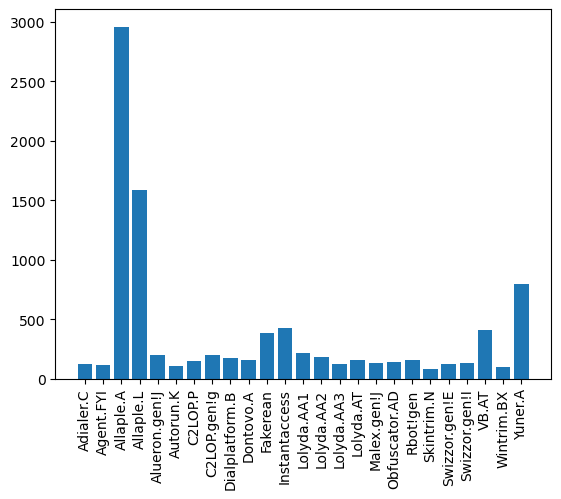

In [18]:
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

Putem observa că setul nostru de date este destul de dezechilibrat: o mulțime de monstre Malware aparțin clasei 2: Allaple.A și clasei 3: Allaple.L!

# Antrenare şi testare model

Hai să împărțim modelul nostru în seturi de antrenare și testare, urmând un raport de 70% antrenare – 30% testare.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(imgs / 255., labels, test_size=0.3, stratify=labels, shuffle=True) #Folosesc Stratify să mă asigur că am aceleași proporții de clase în train și test


In [20]:
X_train.shape

(6543, 64, 64, 3)

In [21]:
X_test.shape

(2805, 64, 64, 3)

In [22]:
y_train.shape

(6543, 25)

In [23]:
y_test.shape

(2805, 25)

## Convolutional Neural Network Model

Modelul nostru **CNN** folosind Keras. Acest model va avea următoarele straturi:

* **Strat convolutiv**: 30 de filtre, dimensiunea nucleului (3 * 3)
* **Strat de împărțire maximă**: dimensiunea împărțirii (2 * 2)
* **Strat convolutiv**: 15 filtre, dimensiunea nucleului (3 * 3)
* **Strat de împărțire maximă**: dimensiunea împărțirii (2 * 2)
* **Strat DropOut**: Elimină 25% dintre neuroni.
* **Strat Flatten**
* **Strat Dense/Complet conectat**: 128 de neuroni, funcție de activare Relu
* **Strat DropOut**: Elimină 50% dintre neuroni.
* **Strat Dense/Complet conectat**: 50 de neuroni, funcție de activare Softmax
* **Strat Dense/Complet conectat**: num_class neuroni, funcție de activare Softmax

**Forma de intrare**: 64 * 64 * 3

In [24]:
import keras
import tensorflow
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import AUC



Vrem **25** de clase ca output.

In [25]:
num_classes = 25

Construirea modelului minimal

In [26]:
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

In [27]:
from keras import backend as K

def recall_m(y_test, y_pred):
    true_positives = K.sum(K.round(K.clip(y_test * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_test, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_test, y_pred):
    true_positives = K.sum(K.round(K.clip(y_test * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_test, y_pred):
    precision = precision_m(y_test, y_pred)
    recall = recall_m(y_test, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



In [28]:
Malware_model = malware_model()

c:\Users\Here\anaconda3\envs\gputf3.10\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
Malware_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 30)     │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2940)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       376,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 389,078 (1.48 MB)

 Trainable params: 389,078 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
y_train.shape

(6543, 25)

class_weights folosește valorile lui y pentru a ajusta automat greutățile invers proporțional cu frecvența claselor din datele de intrare. Pentru a folosi această metodă, y_train nu trebuie să fie codificat one-hot.

In [31]:
y_train_new = np.argmax(y_train, axis=1)

In [32]:
y_train_new

array([ 2,  3, 20, ..., 18, 24, 21], dtype=int64)

In [33]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(y_train_new),
                                                 y = y_train_new)
#class_weights = {i : class_weights[i] for i in range(5)}

class_weights = {l:c for l,c in zip(np.unique(y_train_new), class_weights)}



In [34]:
Malware_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m,AUC()])


Antrenare model

In [35]:
import tensorflow as tf
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = Malware_model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    class_weight=class_weights,
    callbacks=[early_stop]
)




Epoch 1/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1982 - auc: 0.7284 - f1_m: 0.0790 - loss: 2.7241 - precision_m: 0.2628 - recall_m: 0.0498 - val_accuracy: 0.6631 - val_auc: 0.9811 - val_f1_m: 0.4283 - val_loss: 1.0223 - val_precision_m: 0.7644 - val_recall_m: 0.3016
Epoch 2/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5283 - auc: 0.9679 - f1_m: 0.4778 - loss: 0.9213 - precision_m: 0.7732 - recall_m: 0.3508 - val_accuracy: 0.8631 - val_auc: 0.9912 - val_f1_m: 0.5968 - val_loss: 0.7152 - val_precision_m: 0.9342 - val_recall_m: 0.4436
Epoch 3/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6167 - auc: 0.9793 - f1_m: 0.5858 - loss: 0.6356 - precision_m: 0.7753 - recall_m: 0.4756 - val_accuracy: 0.8125 - val_auc: 0.9927 - val_f1_m: 0.7953 - val_loss: 0.5390 - val_precision_m: 0.8415 - val_recall_m: 0.7551
Epoch 4/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7106 - auc: 0.9872 - f1_m: 0.6805 - loss: 0.4658 - precision_m: 0.7900 - recal

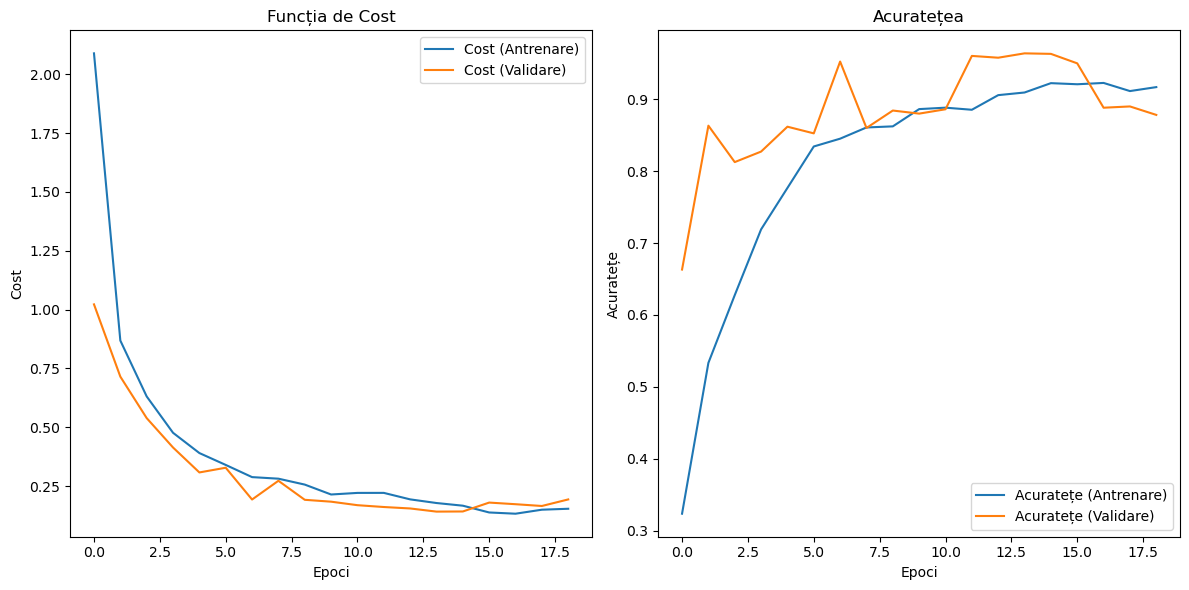

In [36]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Cost (Antrenare)')
plt.plot(history.history['val_loss'], label='Cost (Validare)')
plt.title('Funcția de Cost')
plt.xlabel('Epoci')
plt.ylabel('Cost')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Acuratețe (Antrenare)')
plt.plot(history.history['val_accuracy'], label='Acuratețe (Validare)')
plt.title('Acuratețea')
plt.xlabel('Epoci')
plt.ylabel('Acuratețe')
plt.legend()

plt.tight_layout()
plt.show()

In [37]:
scores = Malware_model.evaluate(X_test, y_test)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9646 - auc: 0.9989 - f1_m: 0.9653 - loss: 0.1387 - precision_m: 0.9680 - recall_m: 0.9626


In [38]:
loss, accuracy, f1_score, precision, recall, auc = \
    Malware_model.evaluate(X_test, y_test)


88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9646 - auc: 0.9989 - f1_m: 0.9653 - loss: 0.1387 - precision_m: 0.9680 - recall_m: 0.9626


In [39]:
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.9636363387107849


In [40]:
Malware_model.save("my_model_64x64.h5")

# Analiza rezultatelor

In [41]:
import numpy as np
import pandas as pd

In [42]:
y_pred = np.argmax(Malware_model.predict(X_test), axis=-1)



88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [43]:
y_pred

array([ 2,  3,  3, ..., 21, 12,  2], dtype=int64)

In [44]:
y_test2 = np.argmax(y_test, axis=1)

In [45]:
y_test2

array([ 2,  3,  3, ..., 21, 12,  2], dtype=int64)

In [46]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test2, y_pred)

In [47]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

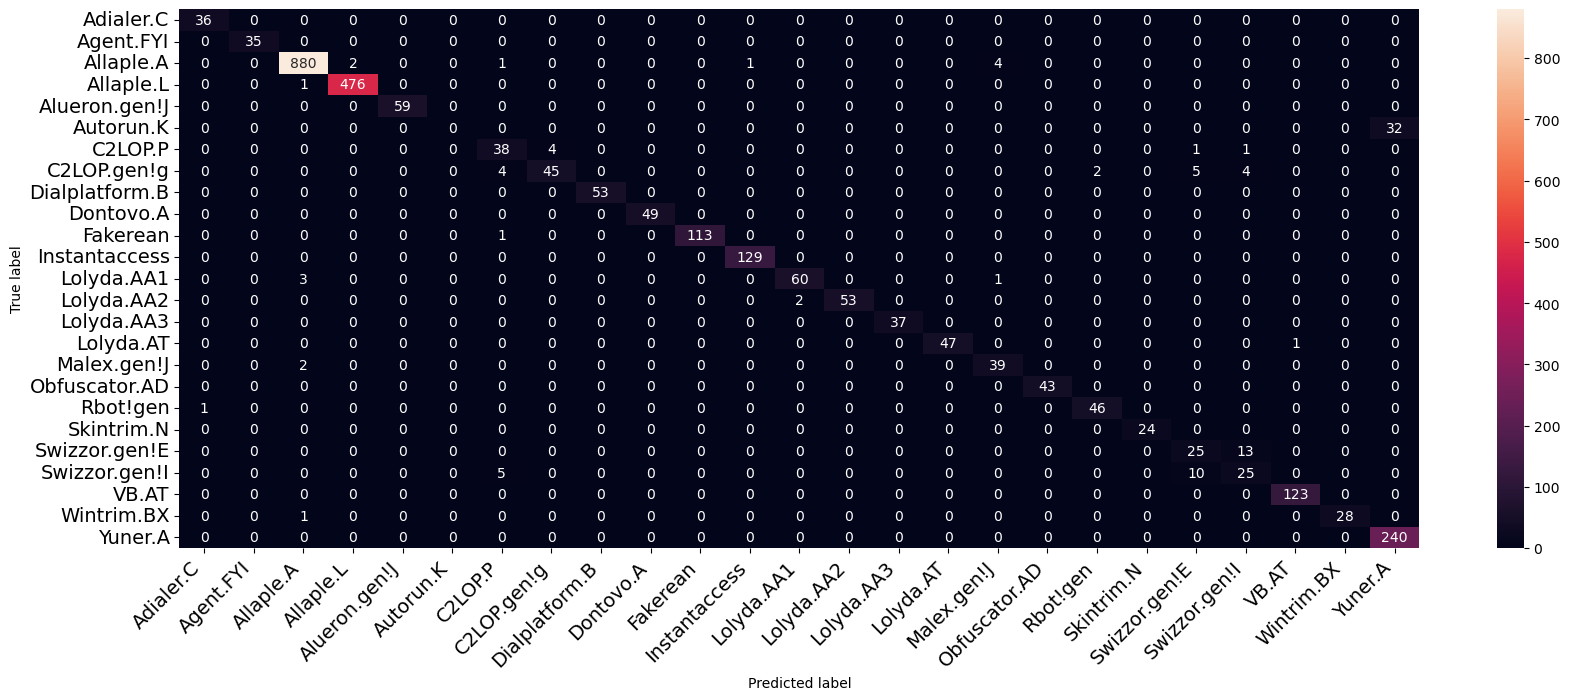

In [48]:
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)

Aceasta este matricea noastră de confuzie. Putem observa că, deși majoritatea malware-urilor au fost clasificate corect, **Autorun.K** este confundat mereu cu **Yuner.A**. Acest lucru se datorează probabil faptului că avem foarte puține exemple de **Autorun.K** în setul nostru de antrenament. În plus, **Swizzor.gen!E** este adesea confundat cu **Swizzor.gen!l**, ceea ce poate fi explicat prin faptul că provin din familii foarte apropiate și, prin urmare, ar putea avea similitudini în codul lor.

In [49]:
results = pd.DataFrame({ 'CNN Model': 'Malware model',    
    'Accuracy': [scores[1]],
    'Loss': [scores[0]],
    'Precision': [scores[3]],
    'Recall' : [scores[4]],
    'f1 score': [scores[2]]})

In [50]:
results

,CNN Model,Accuracy,Loss,Precision,Recall,f1 score
0,Malware model,0.963636,0.141654,0.96562,0.961107,0.963327


In [51]:
from sklearn.metrics import classification_report
import numpy as np

Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = np.argmax(Malware_model.predict(X_test), axis=-1)
print(classification_report(Y_test, y_pred))

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      1.00      1.00        35
           2       0.99      0.99      0.99       888
           3       1.00      1.00      1.00       477
           4       1.00      1.00      1.00        59
           5       0.00      0.00      0.00        32
           6       0.78      0.86      0.82        44
           7       0.92      0.75      0.83        60
           8       1.00      1.00      1.00        53
           9       1.00      1.00      1.00        49
          10       1.00      0.99      1.00       114
          11       0.99      1.00      1.00       129
          12       0.97      0.94      0.95        64
          13       1.00      0.96      0.98        55
          14       1.00      1.00      1.00        37
          15       1.00      0.98      0.99        48
          16       0.89      0.95      0.9

c:\Users\Here\anaconda3\envs\gputf3.10\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Here\anaconda3\envs\gputf3.10\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Here\anaconda3\envs\gputf3.10\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [52]:
import pickle
import matplotlib.pyplot as plt
from PIL import Image
import keras
from keras.preprocessing.image import load_img, img_to_array 
from keras.models import load_model
import PIL


In [53]:
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K

# Definește funcțiile pentru metrici personalizate
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# Încarcă modelul cu toate funcțiile personalizate
model = load_model('my_model_64x64.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})


(1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Lolyda.AA3
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]


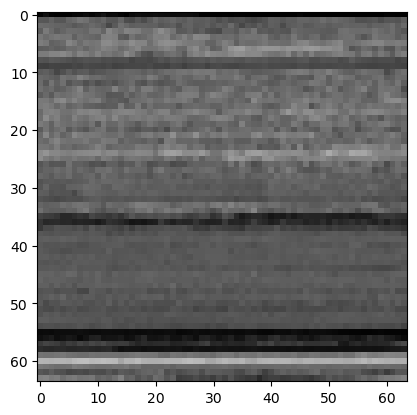

In [54]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

img = load_img("C:\\Users\\Here\\Desktop\\Disertatie-Final\\4. Cod\\Data\\malimg\\Adialer.C\\002f06eff1d222560939be72583d6ae9.png")
img = img.resize((64, 64))
plt.imshow(img)
CATEGORIES = ['Adialer.C','Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J','Autorun.K', 'C2LOP.P','C2LOP.gen!g','Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3','Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen','Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A']

img = img_to_array(img) 
img = img.reshape( -1,64, 64,3)
#print(img)
print(img.shape)
#model.summary()
prediction = model.predict(img)
pred_name = CATEGORIES[np.argmax(prediction)]
print(pred_name)
print(prediction)

Plotare curba AUC

In [55]:
# Obține vectorul de probabilități pentru fiecare clasă
y_score = Malware_model.predict(X_test)
# y_score.shape → (n_samples, n_classes)


88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [56]:
from sklearn.preprocessing import label_binarize

n_classes = num_classes  # de ex. 25
y_test_bin = label_binarize(y_test, classes=range(n_classes))


In [57]:
from sklearn.metrics import roc_curve, auc
import numpy as np

# Inițializări
fpr = dict(); tpr = dict(); roc_auc = dict()

# Per clasă
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro‑average
all_fpr = np.unique(np.concatenate(list(fpr.values())))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


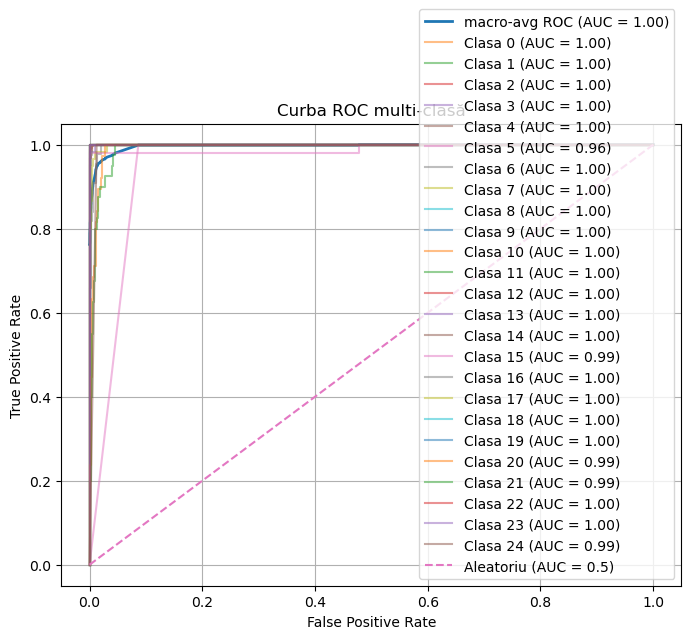

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Curba macro
plt.plot(fpr["macro"], tpr["macro"],
         label=f'macro‑avg ROC (AUC = {roc_auc["macro"]:.2f})', linewidth=2)

# Curbele fiecărei clase
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label=f'Clasa {i} (AUC = {roc_auc[i]:.2f})', alpha=0.5)

# Linia aleatorie
plt.plot([0, 1], [0, 1], linestyle='--', label='Aleatoriu (AUC = 0.5)')

plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Curba ROC multi‑clasă')  
plt.legend(loc='lower right')  
plt.grid(True)  
plt.show()
